In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import utils
import forward_model
import globals
import gradient_descent
import least_squares
import section_search
import coordinate_descent
import initialization

import torch
import math
from PIL import Image
import scipy    


cuda


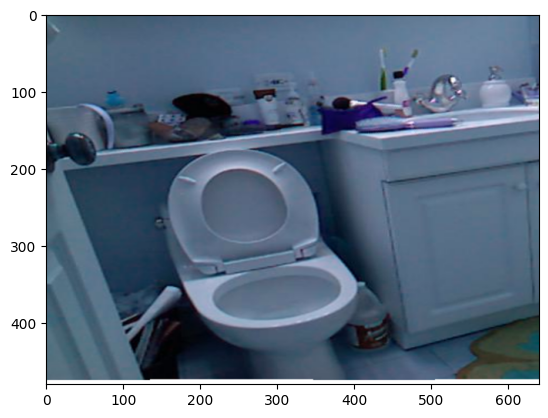

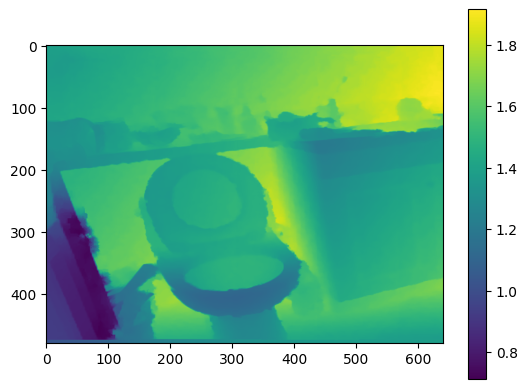

In [2]:
globals.init_NYUv2()

# EXPERIMENT_NAME = 'coord-descent-bracket-search'
# experiment_folder = utils.create_experiment_folder(EXPERIMENT_NAME)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# load data 
# gt_aif, gt_dpt = utils.load_single_sample(sample='0045', set='train', fs=5, res='full')
gt_aif, gt_dpt, _ = utils.load_sample_image(fs=5, res='full')

plt.imshow(gt_aif)
plt.show()

plt.imshow(gt_dpt)
plt.colorbar()
plt.show()

width, height = gt_dpt.shape


adaptive kernel size set to 23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.002210316..1.0544693].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005449175..1.03685].


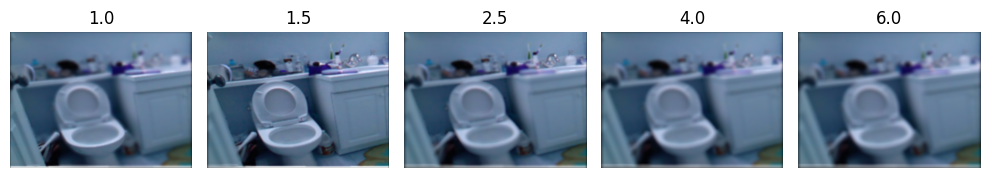

In [3]:
# forward model (torch)
FORWARD_KERNEL_TYPE = 'gaussian'
max_kernel_size = utils.kernel_size_heuristic(width, height)
print('adaptive kernel size set to',max_kernel_size)
utils.update_max_kernel_size(max_kernel_size)

defocus_stack = forward_model.forward(gt_dpt, gt_aif, kernel=FORWARD_KERNEL_TYPE)
defocus_stack_torch = forward_model.forward_torch(gt_dpt, gt_aif, kernel=FORWARD_KERNEL_TYPE)#.float() / 255.0)
utils.plot_single_stack(defocus_stack_torch, globals.Df)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0035101017..1.0558798].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0066213883..1.0319526].


Downsampling defocus stack by 4.0 to 120 x 160


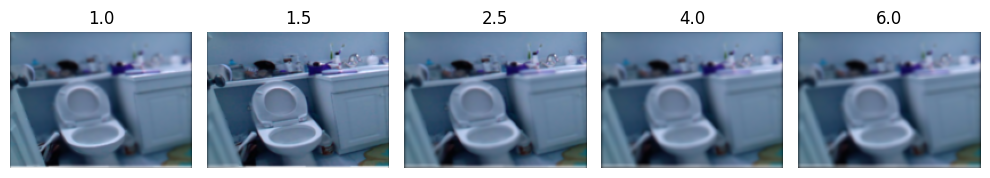

adaptive kernel size set to 7
Created experiment folder: experiments/coord-descent-level2_2025-04-25_15-58-24
Iteration 0 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1976.066547  28885.554824     100
  green   2008.171245  29650.201632     100
   blue   2011.015850  31041.036488     100

AIF result range: [ -535.4184581637383 , 1247.1265287399292 ]
Loss: 41.60346603393555 , TV: 15057937.256011615
Loss after clipping: 462.96240234375 , TV: 8419049.283457477



Grid search         : 100%|█████████████████████| 25/25 [00:37<00:00,  1.52s/it]


Loss: 424.5556458626689

Golden-section search...
...searching for 100 % convergence
...done
Loss: 423.4263804949792 , TV: 34426.17710602671

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 1 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1862.778212  31536.458453     100
  green   1872.406511  32291.762214     100
   blue   1871.829290  33338.674598     100

AIF result range: [ -739.213413578554 , 1166.2127782316393 ]
Loss: 36.387485724848005 , TV: 17815810.91403745
Loss after clipping: 548.5216531502228 , TV: 8931495.368035236



Grid search         : 100%|█████████████████████| 25/25 [00:48<00:00,  1.96s/it]


Loss: 537.9307040300433

Golden-section search...
...searching for 100 % convergence
...done
Loss: 536.694594397221 , TV: 35961.92975700453

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 2 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1860.315549  32191.773573     100
  green   1873.610536  32951.578981     100
   blue   1870.564606  34021.228745     100

AIF result range: [ -642.7734077109322 , 1236.925129620561 ]
Loss: 36.35487679780503 , TV: 18304423.357366487
Loss after clipping: 551.4466801347035 , TV: 9027673.553122045



Grid search         : 100%|█████████████████████| 25/25 [00:45<00:00,  1.82s/it]


Loss: 547.3835063260324

Golden-section search...
...searching for 100 % convergence
...done
Loss: 546.042984497258 , TV: 35238.855611223364

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 3 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1865.335613  31827.738622     100
  green   1875.914726  32666.643308     100
   blue   1873.542172  33774.705942     100

AIF result range: [ -599.5300444914799 , 1145.483265948603 ]
Loss: 36.488525936954034 , TV: 18281110.101539988
Loss after clipping: 551.0044370362262 , TV: 9078925.50441252



Grid search         : 100%|█████████████████████| 25/25 [00:38<00:00,  1.52s/it]


Loss: 548.7036908164614

Golden-section search...
...searching for 100 % convergence
...done
Loss: 547.4441165128094 , TV: 35398.817837975876

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 4 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1870.070401  32165.432165     100
  green   1881.888241  32984.534465     100
   blue   1881.565562  34063.135394     100

AIF result range: [ -670.903131300152 , 1234.6186901909832 ]
Loss: 36.73249248933537 , TV: 18500704.826774474
Loss after clipping: 539.1726241945005 , TV: 9094197.108271135



Grid search         : 100%|█████████████████████| 25/25 [00:37<00:00,  1.50s/it]


Loss: 537.806436646411

Golden-section search...
...searching for 100 % convergence
...done
Loss: 536.5004750885819 , TV: 35338.36321790146

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 5 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1869.468789  31852.085118     100
  green   1879.503041  32645.851588     100
   blue   1879.136079  33755.670650     100

AIF result range: [ -711.4839359186623 , 1160.584117387224 ]
Loss: 36.66180502144672 , TV: 18298677.44292215
Loss after clipping: 540.4144426323024 , TV: 9084791.154963868



Grid search         : 100%|█████████████████████| 25/25 [00:45<00:00,  1.81s/it]


Loss: 539.2751000273327

Golden-section search...
...searching for 100 % convergence
...done
Loss: 538.0200018972465 , TV: 34952.50200277489

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 6 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1862.962304  32205.922582     100
  green   1874.241448  32983.912287     100
   blue   1874.947772  34061.138445     100

AIF result range: [ -699.4622192752744 , 1180.76117946397 ]
Loss: 36.45430864271028 , TV: 18493911.687953204
Loss after clipping: 545.2955445770327 , TV: 9089013.014400598



Grid search         : 100%|█████████████████████| 25/25 [00:40<00:00,  1.61s/it]


Loss: 544.1354125480135

Golden-section search...
...searching for 100 % convergence
...done
Loss: 542.8137881968895 , TV: 35055.8899462478

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 7 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1863.898047  32179.069669     100
  green   1876.386949  32952.076447     100
   blue   1877.614629  34036.046757     100

AIF result range: [ -693.0086805889607 , 1158.2316424228031 ]
Loss: 36.52910698280305 , TV: 18567164.20046775
Loss after clipping: 547.2723312021517 , TV: 9111375.2875758



Grid search         : 100%|█████████████████████| 25/25 [00:56<00:00,  2.27s/it]


Loss: 546.0674943703351

Golden-section search...
...searching for 100 % convergence
...done
Loss: 544.816135778312 , TV: 34831.62145230545

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 8 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1863.966889  31942.212962     100
  green   1874.385638  32767.889900     100
   blue   1874.337734  33870.199637     100

AIF result range: [ -673.2754682806402 , 1149.8529266819871 ]
Loss: 36.46124382857597 , TV: 18343603.410404377
Loss after clipping: 537.2894601017406 , TV: 9061017.926135693



Grid search         : 100%|█████████████████████| 25/25 [01:08<00:00,  2.74s/it]


Loss: 536.2246806181686

Golden-section search...
...searching for 100 % convergence
...done
Loss: 534.9474966865291 , TV: 34367.61640305577

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 9 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1863.313130  31874.783648     100
  green   1874.205888  32722.005626     100
   blue   1875.179655  33792.220321     100

AIF result range: [ -675.8725052178543 , 1259.9930628544557 ]
Loss: 36.461404402088526 , TV: 18344888.991314903
Loss after clipping: 549.2140950308917 , TV: 9082287.09387901



Grid search         : 100%|█████████████████████| 25/25 [01:09<00:00,  2.77s/it]


Loss: 548.3278643777729

Golden-section search...
...searching for 100 % convergence
...done
Loss: 547.0886186277393 , TV: 34949.4693734592

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 10 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1864.891416  31992.679697     100
  green   1876.208221  32828.847930     100
   blue   1874.593314  33923.771840     100

AIF result range: [ -635.0637047874066 , 1130.2790782536472 ]
Loss: 36.500276277014635 , TV: 18398460.489979193
Loss after clipping: 547.5583295775222 , TV: 9080822.621182028



Grid search         : 100%|█████████████████████| 25/25 [00:52<00:00,  2.11s/it]


Loss: 546.7335997736875

Golden-section search...
...searching for 100 % convergence
...done
Loss: 545.4810922201788 , TV: 34540.68813080956

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 11 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1866.521184  31826.056955     100
  green   1876.595363  32731.241830     100
   blue   1876.790637  33836.427986     100

AIF result range: [ -653.8849994821354 , 1233.1597930563862 ]
Loss: 36.55505827574425 , TV: 18350822.913421895
Loss after clipping: 549.1147164233888 , TV: 9083438.382817425



Grid search         : 100%|█████████████████████| 25/25 [01:08<00:00,  2.72s/it]


Loss: 548.464307862866

Golden-section search...
...searching for 100 % convergence
...done
Loss: 547.1884462281803 , TV: 34685.83058660658

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 12 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1864.542289  31947.584239     100
  green   1875.025911  32815.563113     100
   blue   1875.057687  33899.766024     100

AIF result range: [ -652.2755343319784 , 1166.358075368471 ]
Loss: 36.48640152344575 , TV: 18364214.407248233
Loss after clipping: 557.4270298569469 , TV: 9087193.902514301



Grid search         : 100%|█████████████████████| 25/25 [01:15<00:00,  3.04s/it]


Loss: 556.3910054763252

Golden-section search...
...searching for 100 % convergence
...done
Loss: 555.0741334235261 , TV: 34178.33210829208

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 13 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1861.282223  31967.632875     100
  green   1872.651976  32820.696657     100
   blue   1871.924977  33950.021761     100

AIF result range: [ -679.8174318786774 , 1140.8809647459861 ]
Loss: 36.37257724326066 , TV: 18426315.10712222
Loss after clipping: 551.6947489773316 , TV: 9099487.355034724



Grid search         : 100%|█████████████████████| 25/25 [00:53<00:00,  2.14s/it]


Loss: 550.7140124951419

Golden-section search...
...searching for 100 % convergence
...done
Loss: 549.4257705132056 , TV: 34313.030944716855

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 14 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1870.399433  32055.406219     100
  green   1882.889112  32929.098161     100
   blue   1882.459773  34044.655583     100

AIF result range: [ -673.9762440942415 , 1133.6082273990207 ]
Loss: 36.761536314710824 , TV: 18494538.087610185
Loss after clipping: 555.0896198250331 , TV: 9108409.33899926



Grid search         : 100%|█████████████████████| 25/25 [01:09<00:00,  2.77s/it]


Loss: 553.7485810079903

Golden-section search...
...searching for 100 % convergence
...done
Loss: 552.4867580096895 , TV: 35343.999603003525

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 15 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1870.294124  31952.725619     100
  green   1879.071908  32848.824091     100
   blue   1877.554351  33975.546278     100

AIF result range: [ -696.2822130190722 , 1136.6804028924519 ]
Loss: 36.64626350723859 , TV: 18465359.892993417
Loss after clipping: 553.0129164325831 , TV: 9119979.569816664



Grid search         : 100%|█████████████████████| 25/25 [01:03<00:00,  2.52s/it]


Loss: 551.8066461408602

Golden-section search...
...searching for 100 % convergence
...done
Loss: 550.5394330530327 , TV: 34420.07537937335

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 16 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1868.708959  32087.600754     100
  green   1881.252923  32927.807866     100
   blue   1879.325351  34064.731393     100

AIF result range: [ -671.007171782085 , 1269.461627139618 ]
Loss: 36.677262894052504 , TV: 18512781.63075088
Loss after clipping: 553.627583695315 , TV: 9132245.00229453



Grid search         : 100%|█████████████████████| 25/25 [00:51<00:00,  2.08s/it]


Loss: 552.505488857503

Golden-section search...
...searching for 100 % convergence
...done
Loss: 551.1782091054782 , TV: 35158.54359616629

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 17 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1868.029089  32110.194350     100
  green   1879.800408  32918.423550     100
   blue   1878.474640  34000.881524     100

AIF result range: [ -721.395664706308 , 1129.1969957133347 ]
Loss: 36.638373032997265 , TV: 18444825.58101391
Loss after clipping: 554.2620198572378 , TV: 9095791.625899246



Grid search         : 100%|█████████████████████| 25/25 [00:44<00:00,  1.79s/it]


Loss: 553.3174607443511

Golden-section search...
...searching for 100 % convergence
...done
Loss: 552.061785184043 , TV: 34713.784023600194

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 18 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1873.167262  32060.107048     100
  green   1886.293381  32923.737585     100
   blue   1883.434715  34046.005184     100

AIF result range: [ -706.5738786280247 , 1208.1041870434387 ]
Loss: 36.854815456078484 , TV: 18530420.685383648
Loss after clipping: 556.3358800218115 , TV: 9126409.384051383



Grid search         : 100%|█████████████████████| 25/25 [00:35<00:00,  1.40s/it]


Loss: 555.4942579190781

Golden-section search...
...searching for 100 % convergence
...done
Loss: 554.2299234293229 , TV: 34795.45620316686

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 19 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   1873.552106  32007.772600     100
  green   1886.988665  32846.601186     100
   blue   1883.872719  33980.783386     100

AIF result range: [ -700.139084628784 , 1305.5642663604303 ]
Loss: 36.87466096544072 , TV: 18562016.408372656
Loss after clipping: 553.1110361268113 , TV: 9152234.859699545



Grid search         : 100%|█████████████████████| 25/25 [01:04<00:00,  2.56s/it]


Loss: 552.3774699213418

Golden-section search...
...searching for 100 % convergence
...done
Loss: 551.1440684001768 , TV: 34624.173810663226

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0027505902..1.0579616].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0058633415..1.0322748].


Downsampling defocus stack by 2.0 to 240 x 320


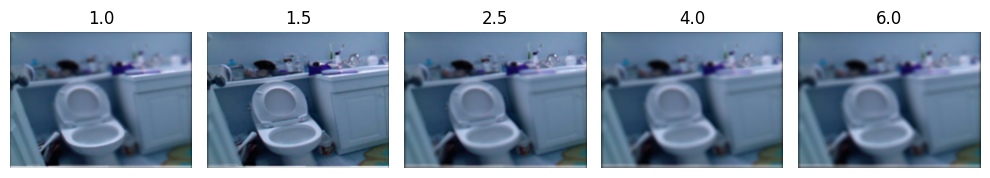

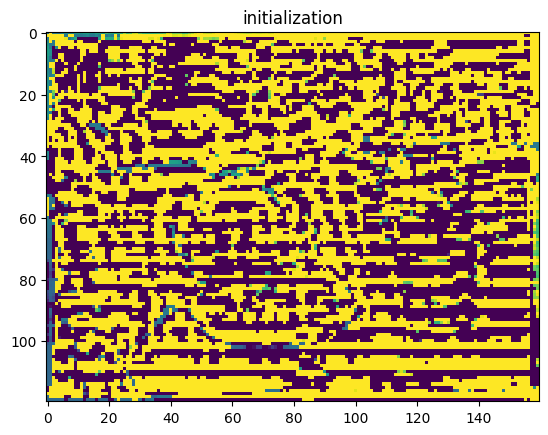

adaptive kernel size set to 11
Created experiment folder: experiments/coord-descent-level1_2025-04-25_16-33-23


TypeError: expected np.ndarray (got Tensor)

In [11]:
# nested optimization -- first downsample everything

def downsample_image_stack_torch(stack, factor):
    stack_torch = torch.from_numpy(stack).permute(0, 3, 1, 2).float()  # (batch, channels, height, width)
    images_down = torch.nn.functional.interpolate(stack_torch, scale_factor=1/factor, mode='area')
    images_down = images_down.permute(0, 2, 3, 1).numpy()
    return images_down


num_settings, width, height, _ = defocus_stack.shape
num_levels = 2

# aif_init = None
# dpt_init = None

all_dpt = []
all_aif = []
least_squares_first=False


first = True

for i in range(num_levels, -1, -1):
    
    # downsample defocus stack
    factor = math.pow(2, i)
    
    # downsampled_defocus_stack = []
    # for j in range(num_settings):
    #     img = Image.fromarray(defocus_stack[j] / 255.)
    #     img_resized = img.resize((width // factor, height // factor), Image.Resampling.LANCZOS) # anti-alias
    #     downsampled_defocus_stack.append(np.array(img_resized * 255., dtype=np.float32))
    # downsampled_defocus_stack = np.stack(downsampled_defocus_stack, axis=0)
    downsampled_defocus_stack = downsample_image_stack_torch(defocus_stack, factor)
    # print(downsampled_defocus_stack.shape)
    _, downsampled_width, downsampled_height, _ = downsampled_defocus_stack.shape
    print('Downsampling defocus stack by', factor, 'to', downsampled_width, 'x', downsampled_height)
    utils.plot_single_stack(downsampled_defocus_stack, globals.Df)
    
    if first: # first iter 
        dpt_init = 1
        # aif_init = initialization.compute_aif_initialization(downsampled_defocus_stack, lmbda=0.05, sharpness_measure='laplacian')
        # plt.imshow(aif_init / 255.)
        # plt.title('initialization')
        # plt.show()
        least_squares_first = True
        first = False
    else:
        dpt_init = scipy.ndimage.zoom(dpt, zoom=2, order=1) # upsample last result
        plt.imshow(dpt_init, vmin=0.9, vmax=1.7)
        plt.title('initialization')
        plt.show()
        least_squares_first = True

    # update based on image size
    max_kernel_size = utils.kernel_size_heuristic(downsampled_width, downsampled_height)
    print('adaptive kernel size set to',max_kernel_size)
    utils.update_max_kernel_size(max_kernel_size)
    
    dpt, aif = coordinate_descent.coordinate_descent(downsampled_width, downsampled_height, downsampled_defocus_stack, show_plots=False,
                                                     save_plots=True, num_epochs=20, experiment_name = 'coord-descent-level'+str(i),
                                                     least_squares_first=least_squares_first, depth_init=dpt_init, #aif_init=aif_init, 
                                                     finite_differences=False, num_Z=25, use_CUDA=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0027505902..1.0579616].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0058633415..1.0322748].


Downsampling defocus stack by 2.0 to 240 x 320


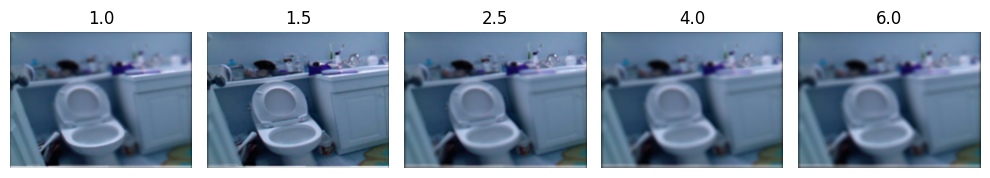

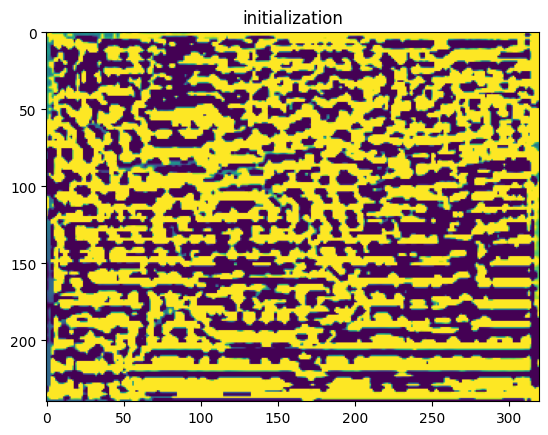

adaptive kernel size set to 11
Created experiment folder: experiments/coord-descent-level1_2025-04-25_16-38-39
Iteration 0 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   3752.051039  40272.463891     100
  green   3801.092738  43728.760084     100
   blue   3742.913571  47891.624478     100

AIF result range: [ -1181.6962087154388 , 1363.6376194953918 ]
Loss: 36.92341995239258 , TV: 31922182.81277369
Loss after clipping: 273.80584716796875 , TV: 21830676.719788387



Grid search         : 100%|█████████████████████| 25/25 [05:08<00:00, 12.35s/it]


Loss: 251.336015112257

Golden-section search...
...searching for 100 % convergence
...done
Loss: 248.73840566955636 , TV: 113186.94635389073

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 1 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   3285.150198  37752.809500     100
  green   3297.459454  41119.931292     100
   blue   3212.244105  45245.534651     100

AIF result range: [ -847.3701673916357 , 1491.1141030877652 ]
Loss: 27.763856464305995 , TV: 28944207.87959291
Loss after clipping: 182.7809631556959 , TV: 20604290.554804128



Grid search         : 100%|█████████████████████| 25/25 [04:59<00:00, 12.00s/it]


Loss: 174.62487621020614

Golden-section search...
...searching for 100 % convergence
...done
Loss: 171.09508091222747 , TV: 108365.46583053318

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 2 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   3042.179210  36236.774483     100
  green   3043.218453  39897.758872     100
   blue   2951.229192  44202.784677     100

AIF result range: [ -769.0984881638102 , 2058.666519310497 ]
Loss: 23.63349518918808 , TV: 27406193.087698035
Loss after clipping: 152.70753514276214 , TV: 20098020.66807589



Grid search         : 100%|█████████████████████| 25/25 [05:45<00:00, 13.83s/it]


Loss: 148.23781037848542

Golden-section search...
...searching for 100 % convergence
...done
Loss: 144.03022367684912 , TV: 104169.08626269133

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 3 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2809.727002  34148.143474     100
  green   2814.470478  38046.027173     100
   blue   2733.696835  42592.503533     100

AIF result range: [ -850.8273639389934 , 1445.7229750529498 ]
Loss: 20.216066081397738 , TV: 25055507.31549853
Loss after clipping: 126.0217408660419 , TV: 19215475.08567106



Grid search         : 100%|█████████████████████| 25/25 [03:42<00:00,  8.89s/it]


Loss: 125.16395885741434

Golden-section search...
...searching for 100 % convergence
...done
Loss: 120.61540326847138 , TV: 99524.48682484639

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 4 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2668.038612  32764.094788     100
  green   2676.509158  36807.418373     100
   blue   2605.335939  41692.455889     100

AIF result range: [ -574.4493654274575 , 1232.3827978340714 ]
Loss: 18.289849413587664 , TV: 23408966.546080403
Loss after clipping: 102.9001026295686 , TV: 18596669.310034152



Grid search         : 100%|█████████████████████| 25/25 [02:37<00:00,  6.31s/it]


Loss: 104.2962068468799

Golden-section search...
...searching for 100 % convergence
...done
Loss: 99.66395114669898 , TV: 100312.04408621235

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 5 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2614.646336  32134.044487     100
  green   2626.055011  36303.758693     100
   blue   2558.862949  41285.567592     100

AIF result range: [ -528.2167480784318 , 1137.4146470096457 ]
Loss: 17.604444302706877 , TV: 22571855.450790714
Loss after clipping: 92.93826986273437 , TV: 18284272.101852067



Grid search         : 100%|█████████████████████| 25/25 [02:42<00:00,  6.50s/it]


Loss: 95.29825720490894

Golden-section search...
...searching for 100 % convergence
...done
Loss: 90.57738092567678 , TV: 97604.99639205137

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 6 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2570.310115  31646.894002     100
  green   2579.234117  35933.151339     100
   blue   2511.696898  40954.560956     100

AIF result range: [ -519.449948287017 , 1054.8494494049883 ]
Loss: 16.98573255145227 , TV: 21885058.987583555
Loss after clipping: 88.85928886103258 , TV: 17939922.971675817



Grid search         : 100%|█████████████████████| 25/25 [03:37<00:00,  8.70s/it]


Loss: 92.00963329211051

Golden-section search...
...searching for 100 % convergence
...done
Loss: 87.23691587355931 , TV: 96301.90481904833

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 7 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2528.376133  31685.283883     100
  green   2535.695940  35947.416337     100
   blue   2471.799227  40949.753960     100

AIF result range: [ -604.0391423359927 , 955.9057382922921 ]
Loss: 16.434228353867017 , TV: 21853892.391212687
Loss after clipping: 88.32730122246512 , TV: 17920929.306918718



Grid search         : 100%|█████████████████████| 25/25 [03:20<00:00,  8.02s/it]


Loss: 91.88261552950537

Golden-section search...
...searching for 100 % convergence
...done
Loss: 87.12912157184803 , TV: 94811.34706691476

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 8 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2524.682035  31559.289866     100
  green   2530.803061  35852.414322     100
   blue   2470.402540  40936.643821     100

AIF result range: [ -551.9039293585113 , 800.737082897505 ]
Loss: 16.39051397071143 , TV: 21766999.235731788
Loss after clipping: 88.16947817132055 , TV: 17908315.597422663



Grid search         : 100%|█████████████████████| 25/25 [03:26<00:00,  8.27s/it]


Loss: 92.02302537883492

Golden-section search...
...searching for 100 % convergence
...done
Loss: 87.22036162211207 , TV: 95162.04556302573

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 9 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2504.962560  31685.725103     100
  green   2508.950730  35976.367226     100
   blue   2453.000825  41026.447417     100

AIF result range: [ -575.838821824046 , 738.322613876772 ]
Loss: 16.134448014201993 , TV: 21859432.913509212
Loss after clipping: 90.19006561783421 , TV: 17939075.835471556



Grid search         : 100%|█████████████████████| 25/25 [02:16<00:00,  5.47s/it]


Loss: 94.07999921174952

Golden-section search...
...searching for 100 % convergence
...done
Loss: 89.22406506949805 , TV: 94023.85267286567

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 10 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2504.865636  31650.318913     100
  green   2513.332938  35955.630162     100
   blue   2456.690668  41020.165988     100

AIF result range: [ -641.6990748538097 , 714.9536521948309 ]
Loss: 16.168856973453373 , TV: 21808585.209404197
Loss after clipping: 90.10730881157755 , TV: 17911422.75861288



Grid search         : 100%|█████████████████████| 25/25 [01:55<00:00,  4.61s/it]


Loss: 93.93375671791335

Golden-section search...
...searching for 100 % convergence
...done
Loss: 89.10406762910817 , TV: 93570.41359343333

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 11 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2496.009306  31625.412992     100
  green   2500.874752  35941.537002     100
   blue   2440.322870  41008.070994     100

AIF result range: [ -524.8899048474123 , 782.7962372169452 ]
Loss: 16.006608133004 , TV: 21853730.286584347
Loss after clipping: 88.48722978754236 , TV: 17948393.537771966



Grid search         : 100%|█████████████████████| 25/25 [01:50<00:00,  4.41s/it]


Loss: 92.16558843596452

Golden-section search...
...searching for 100 % convergence
...done
Loss: 87.36963062625195 , TV: 93253.70814706219

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 12 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2481.364918  31546.268373     100
  green   2493.618596  35857.490688     100
   blue   2435.964603  40935.109115     100

AIF result range: [ -537.1628784947427 , 708.6554349010592 ]
Loss: 15.893427936509154 , TV: 21751497.051043235
Loss after clipping: 87.91223781649641 , TV: 17918624.86859673



Grid search         : 100%|█████████████████████| 25/25 [01:55<00:00,  4.61s/it]


Loss: 91.79794840506928

Golden-section search...
...searching for 100 % convergence
...done
Loss: 86.99725005068933 , TV: 93731.95100532162

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 13 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2489.524695  31509.662997     100
  green   2500.684880  35831.295202     100
   blue   2443.813426  40937.722433     100

AIF result range: [ -574.6188136448598 , 707.2913744151807 ]
Loss: 15.99251911014538 , TV: 21652410.381425805
Loss after clipping: 86.9667422797511 , TV: 17863362.35022982



Grid search         : 100%|█████████████████████| 25/25 [01:36<00:00,  3.87s/it]


Loss: 90.9604528671768

Golden-section search...
...searching for 100 % convergence
...done
Loss: 86.14191257727917 , TV: 93682.6585034432

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 14 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2477.245723  31419.940224     100
  green   2483.788939  35753.639392     100
   blue   2429.596103  40891.588579     100

AIF result range: [ -637.3310122877966 , 716.7764986064295 ]
Loss: 15.806328962771564 , TV: 21498840.357157856
Loss after clipping: 85.00864817335342 , TV: 17792830.40514303



Grid search         : 100%|█████████████████████| 25/25 [01:59<00:00,  4.78s/it]


Loss: 88.97586209646117

Golden-section search...
...searching for 100 % convergence
...done
Loss: 84.13700485397288 , TV: 93438.66904629825

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 15 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2480.104220  31404.205544     100
  green   2484.939524  35726.184434     100
   blue   2431.831929  40895.654163     100

AIF result range: [ -661.6131726707496 , 615.1883939171762 ]
Loss: 15.833027598321337 , TV: 21481988.957190283
Loss after clipping: 85.95435376214962 , TV: 17796793.886426713



Grid search         : 100%|█████████████████████| 25/25 [01:54<00:00,  4.59s/it]


Loss: 89.92647525016628

Golden-section search...
...searching for 100 % convergence
...done
Loss: 85.02508509183451 , TV: 93117.6201307386

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 16 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2463.768785  31349.812823     100
  green   2466.453359  35670.536404     100
   blue   2414.213279  40857.706108     100

AIF result range: [ -610.2182533087333 , 647.0142555520641 ]
Loss: 15.609352804294215 , TV: 21278294.232238848
Loss after clipping: 85.59693581447665 , TV: 17658324.16681353



Grid search         : 100%|█████████████████████| 25/25 [03:04<00:00,  7.37s/it]


Loss: 89.6528858358442

Golden-section search...
...searching for 100 % convergence
...done
Loss: 84.76409976125498 , TV: 92859.06635673251

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 17 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2466.256515  31380.514082     100
  green   2469.756265  35674.363224     100
   blue   2419.689236  40874.080313     100

AIF result range: [ -700.364001918392 , 682.5052433380674 ]
Loss: 15.657129413379906 , TV: 21282366.548382558
Loss after clipping: 84.91072883787591 , TV: 17686765.204144564



Grid search         : 100%|█████████████████████| 25/25 [02:32<00:00,  6.09s/it]


Loss: 89.00535552208635

Golden-section search...
...searching for 100 % convergence
...done
Loss: 84.09783630134805 , TV: 92358.2023296859

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 18 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2458.391101  31329.457617     100
  green   2465.328560  35604.559432     100
   blue   2420.430333  40824.229776     100

AIF result range: [ -631.1281870210738 , 640.295425221564 ]
Loss: 15.607651557827362 , TV: 21189556.699829385
Loss after clipping: 83.91894571105536 , TV: 17617145.634229854



Grid search         : 100%|█████████████████████| 25/25 [02:40<00:00,  6.43s/it]


Loss: 88.04076227773871

Golden-section search...
...searching for 100 % convergence
...done
Loss: 83.10617406804873 , TV: 92323.95442548214

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------

Iteration 19 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.
    red   2461.226956  31307.846256     100
  green   2463.275924  35659.552896     100
   blue   2420.377038  40887.885077     100

AIF result range: [ -621.7589334122905 , 685.8330110551357 ]
Loss: 15.61075632778429 , TV: 21317903.988200247
Loss after clipping: 83.89226391018481 , TV: 17727333.276603125



Grid search         : 100%|█████████████████████| 25/25 [02:24<00:00,  5.78s/it]


Loss: 88.08541254763688

Golden-section search...
...searching for 100 % convergence
...done
Loss: 83.14174079228658 , TV: 91952.82592566675

DPT result range: [ 0.10167694011838033 , 9.99832305988162 ]


--------------------------



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.002210316..1.0544693].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005449175..1.03685].


Downsampling defocus stack by 1.0 to 480 x 640


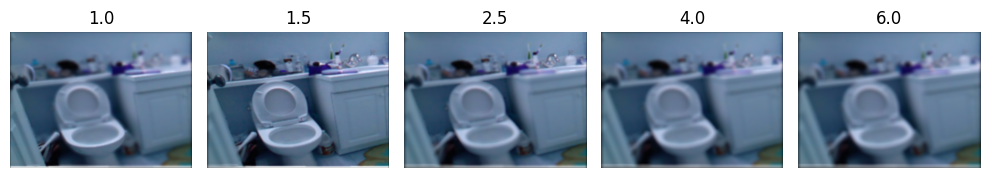

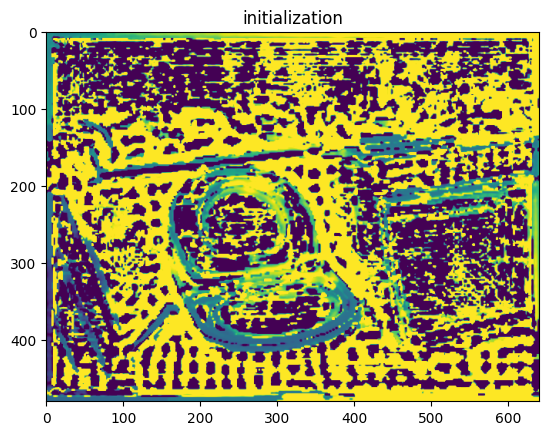

adaptive kernel size set to 23
Created experiment folder: experiments/coord-descent-level0_2025-04-25_18-48-05
Iteration 0 

Least squares...

Channel        r1norm       norm(x)  Num. Iters.


KeyboardInterrupt: 

In [15]:
# nested optimization -- first downsample everything
for i in range(num_levels-1, -1, -1):
    
    # downsample defocus stack
    factor = math.pow(2, i)
    
    # downsampled_defocus_stack = []
    # for j in range(num_settings):
    #     img = Image.fromarray(defocus_stack[j] / 255.)
    #     img_resized = img.resize((width // factor, height // factor), Image.Resampling.LANCZOS) # anti-alias
    #     downsampled_defocus_stack.append(np.array(img_resized * 255., dtype=np.float32))
    # downsampled_defocus_stack = np.stack(downsampled_defocus_stack, axis=0)
    downsampled_defocus_stack = downsample_image_stack_torch(defocus_stack, factor)
    # print(downsampled_defocus_stack.shape)
    _, downsampled_width, downsampled_height, _ = downsampled_defocus_stack.shape
    print('Downsampling defocus stack by', factor, 'to', downsampled_width, 'x', downsampled_height)
    utils.plot_single_stack(downsampled_defocus_stack, globals.Df)
    
    dpt_init = scipy.ndimage.zoom(dpt, zoom=2, order=1)
    plt.imshow(dpt_init, vmin=0.9, vmax=1.7)
    plt.title('initialization')
    plt.show()
    least_squares_first = True

    # update based on image size
    max_kernel_size = utils.kernel_size_heuristic(downsampled_width, downsampled_height)
    print('adaptive kernel size set to',max_kernel_size)
    utils.update_max_kernel_size(max_kernel_size)
    
    dpt, aif = coordinate_descent.coordinate_descent(downsampled_width, downsampled_height, downsampled_defocus_stack, show_plots=False,
                                                     save_plots=True, num_epochs=20, experiment_name = 'coord-descent-level'+str(i),
                                                     least_squares_first=least_squares_first, depth_init=dpt_init, #aif_init=aif_init, 
                                                     finite_differences=False, num_Z=25, use_CUDA=False)

In [ ]:
utils.plot_compare_rgb(aif.cpu(), gt_aif)
plt.show()

In [ ]:
utils.plot_compare_greyscale(dpt.cpu(), gt_dpt, vmin=0.7, vmax=1.9)
plt.show()

In [ ]:
# worst_coords = utils.get_worst_diff_pixels(dpt.cpu(), gt_dpt,
#     num_worst_pixels = 20)

# _, Z, _, all_losses = section_search.grid_search(aif.cpu(), defocus_stack_torch.cpu())

indices = forward_model.precompute_indices(width, height)
defocus_stacks = torch.zeros((len(Z), 5, width, height, 3))
for k in range(len(Z)):
    defocus_stack_k = forward_model.forward_torch(torch.full((width,height), Z[k]).to(aif.device),
                                                  aif, indices=indices)

    defocus_stacks[k] = defocus_stack_k

for i, j in worst_coords[:5]:
    section_search.plot_grid_search_on_pixel(i.item(), j.item(), Z, all_losses, gt_dpt)
    
    i_min = max(0, i.item()-max_kernel_size//2)
    i_max = min(width, i.item()+max_kernel_size//2+1)
    j_min = max(0, j.item()-max_kernel_size//2)
    j_max = min(height, j.item()+max_kernel_size//2+1)
    plt.imshow(aif.cpu()[i_min:i_max, j_min:j_max] / 255.)
    plt.title("Local AIF region for ("+str(i.item())+", "+str(j.item())+")")
    plt.show()
    print('Red range:',aif.cpu()[i_min:i_max, j_min:j_max, 0].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 0].max().item())
    print('Green range:',aif.cpu()[i_min:i_max, j_min:j_max, 1].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 1].max().item())
    print('Blue range:',aif.cpu()[i_min:i_max, j_min:j_max, 2].min().item(),
          '-',aif.cpu()[i_min:i_max, j_min:j_max, 2].max().item())
    print('TV of AIF region:',section_search.total_variation_torch(aif[i_min:i_max, j_min:j_max]).item())
    # plt.imshow(gt_aif.cpu()[i_min:i_max, j_min:j_max] / 255.)
    # plt.title("GT local region for ("+str(i.item())+", "+str(j.item())+")")
    # plt.show()
    
    plt.imshow(dpt.cpu()[i_min:i_max, j_min:j_max], vmin=0.9, vmax=1.7)
    plt.title("Local DPT region for ("+str(i.item())+", "+str(j.item())+")")
    plt.show()
    print('TV of depth map region:',section_search.total_variation_torch(dpt[i_min:i_max, j_min:j_max]).item())

    
    # plt.imshow(defocus_stacks[:,:,i.item(),j.item(),:] / 255.)
    # plt.show()

    
    mse = torch.mean((defocus_stacks[:,:,i.item(),j.item(),:] - defocus_stack_torch[:,i.item(),j.item(),:]) ** 2, axis=2)
    # plt.imshow(mse)
    # plt.colorbar()
    # plt.show()

    fig, ax = plt.subplots(figsize=(10, 20))
    cax = ax.imshow(mse, cmap="viridis", aspect="auto", interpolation="nearest")
    
    cbar = plt.colorbar(cax, ax=ax, shrink=0.3)
    cbar.set_label("Color Scale")
    
    ax.set_yticks(np.arange(len(Z)))
    ax.set_yticklabels([np.round(z,2) for z in Z], fontsize=8)
    ax.set_ylabel('Z (Depth)', fontsize=10)
    
    ax.set_xticks(np.arange(len(globals.Df)))
    ax.set_xticklabels([df.item() for df in globals.Df], fontsize=8)
    ax.set_xlabel('d_f (Focus Setting in Focal Stack)', fontsize=10)
    
    ax.grid(which="minor", color="white", linestyle="-", linewidth=1)
    ax.set_xticks(np.arange(-0.5, 5, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 100, 1), minor=True)
    
    plt.show()



In [ ]:
plt.imshow((dpt.cpu()-gt_dpt.cpu())**2)
plt.colorbar()
plt.title('(DPT - GT DPT)^2')
plt.show()

In [ ]:
tol=0.1
for df in globals.Df:
    mask = np.abs(gt_dpt.detach().cpu().numpy() - df.item()) <= tol
    y_coords, x_coords = np.where(mask)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(gt_dpt.cpu(), vmin=0.9, vmax=1.7)
    plt.scatter(x_coords, y_coords, color='red', marker='x', s=10, label=f'Within ±{tol} of {df}m')
    plt.legend()
    plt.title('Points Close to '+str(df.item())+' m')
    plt.axis('off')
    plt.show()

In [ ]:
pad = max_kernel_size // 2
width, height, _ = aif.shape

gt_aif_tv_map = np.zeros((width, height))
aif_tv_map = np.zeros((width, height))
gt_tv_map = np.zeros((width, height))
tv_map = np.zeros((width, height))

for i in range(pad, width - pad):
    for j in range(pad, height - pad):
        gt_window = gt_aif.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        gt_aif_tv_map[i, j] = coordinate_descent.total_variation_torch(gt_window).item()
        window = aif.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        aif_tv_map[i, j] = coordinate_descent.total_variation_torch(window).item()
        
        gt_window = gt_dpt.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        gt_tv_map[i, j] = coordinate_descent.total_variation_torch(gt_window).item()
        window = dpt.cpu()[i - pad:i + pad + 1, j - pad:j + pad + 1]
        tv_map[i, j] = coordinate_descent.total_variation_torch(window).item()

vmin = min(aif_tv_map.min(), gt_aif_tv_map.min())
vmax = max(aif_tv_map.max(), gt_aif_tv_map.max())
utils.plot_compare_greyscale((aif_tv_map - vmin) / (vmax-vmin), (gt_aif_tv_map - vmin) / (vmax-vmin))
# plt.title('TV of AIF')
plt.show()

vmin = min(tv_map.min(), gt_tv_map.min())
vmax = max(tv_map.max(), gt_tv_map.max())
utils.plot_compare_greyscale((tv_map - vmin) / (vmax-vmin), (gt_tv_map - vmin) / (vmax-vmin))
# plt.title('TV of depth maps')
plt.show()

In [ ]:
print(dpt.cpu()[i.item(),j.item()])
print(gt_dpt.cpu()[i.item(),j.item()])

In [ ]:
u, v, row, col, mask = indices

r = forward_model.computer(gt_dpt, globals.Df)
print(r.shape)
_, _, fs = r.shape
r = r.unsqueeze(-1).unsqueeze(-1)
    
G, _ = forward_model.computeG(r, u, v)
print(G.shape)

In [ ]:
print(r[i.item(),j.item()])

In [ ]:
num_plots = len(globals.Df)
fig, axes = plt.subplots(1, num_plots, figsize=(20, 5), constrained_layout=True)

vmin = 0#torch.min(G[222, 178, :, :, :]).item()
vmax = 0.05#torch.max(G[222, 178, :, :, :]).item()

# Plot each subplot with a shared color scale
for k in range(num_plots):
    im = axes[k].imshow(G[i.item(), j.item(), k, :, :].cpu(), vmin=vmin, vmax=vmax)  # Ensure it's on CPU for plotting
    axes[k].set_title(globals.Df[k].item())
    print(G[i.item(), j.item(), k, :, :].sum())

# Create a global colorbar
cbar = fig.colorbar(im, ax=axes, orientation="vertical", fraction=0.02, pad=0.02)
cbar.set_label("Color Scale")

# Show the figure
plt.title('Blur Kernels')
plt.show()

In [ ]:
utils.plot_single_stack(defocus_stack_torch[:,i_min:i_max,j_min:j_max,:], globals.Df, recon_max=255.)


In [ ]:
utils.plot_single_stack(forward_model.forward_torch(dpt.cpu(), aif.cpu())[:,i_min:i_max,j_min:j_max,:], globals.Df, recon_max=255.)


In [ ]:
print(u.shape, v.shape, r.shape, G.shape)

In [ ]:
print(defocus_stack_torch[i.item(),j.item()])

In [ ]:
forward_model.forward_torch(dpt.cpu(), aif.cpu())[:,i_min:i_max,j_min:j_max,:]